## Data Overview

This dataset is designed to facilitate the development of predictive models for attendants' obesity. This portfolio part will mainly cluster to find groups within data and perform linear regression on some variables within the groups to determine the outcome of people's weight, indicating whether a person is likely to suffer from obesity.

The dataset includes diverse features such as gender, age, height, technology usage frequency, weekly study time, and other relevant features, providing a comprehensive foundation for sophisticated data-driven analysis and decision-making.

The dataset includes the following columns:

|Column|Meaning|
|:-----|:-----|
|Gender| Gender|
|Age| Age|
|Height| Height|
|Weight| Weight|
|family_history_with_overweight| If family member suffers overweight|
|FAVC| High calories food frequency|
|FCVC| Vegetable consume frequency|
|NCP| Number of meals daily|
|CAEC| Is there any food between meals|
|SMOKE| Is the person smoke|
|CH2O| Amount of water daily|
|SCC| Does the person monitor the calories|
|FAF| weekly study time|
|TUE| Technology usage frequency|
|CALC| Alcohol frequency|
|MTRANS| Transportation|
|NObeysdad| Obesity level|

## The dataset and some basic information

In [2]:
import pandas as pd

data = pd.read_csv('obesity.csv')
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
data.describe(include="all")

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111,2111.000000,2111.000000,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,4,5,7
top,Male,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,NaN,NaN,NaN,1726,1866,NaN,NaN,1765,2067,NaN,2015,NaN,NaN,1401,1580,351
mean,NaN,24.312600,1.701677,86.586058,NaN,NaN,2.419043,2.685628,NaN,NaN,2.008011,NaN,1.010298,0.657866,NaN,NaN,NaN
std,NaN,6.345968,0.093305,26.191172,NaN,NaN,0.533927,0.778039,NaN,NaN,0.612953,NaN,0.850592,0.608927,NaN,NaN,NaN
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,19.947192,1.630000,65.473343,NaN,NaN,2.000000,2.658738,NaN,NaN,1.584812,NaN,0.124505,0.000000,NaN,NaN,NaN
50%,NaN,22.777890,1.700499,83.000000,NaN,NaN,2.385502,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625350,NaN,NaN,NaN
75%,NaN,26.000000,1.768464,107.430682,NaN,NaN,3.000000,3.000000,NaN,NaN,2.477420,NaN,1.666678,1.000000,NaN,NaN,NaN


## Step 1 Handle categorical attributes

1. If all the categorical values of a column are unique, this column does not provide any statistical informaiton and should be deleted.
2. Use one hot encoding to convert the categorical values into numerical ones.

In [9]:
data.shape

(2111, 17)

In [11]:
for i in data.columns:
    if data[i].dtype == 'object':
        print(i)

Gender
family_history_with_overweight
FAVC
CAEC
SMOKE
SCC
CALC
MTRANS
NObeyesdad


In [13]:
count1 = data['family_history_with_overweight'].nunique()
print('Count of unique in family_history_with_overweight:', count1)

count2 = data['FAVC'].nunique()
print('Count of unique in FAVC:', count2)

count3 = data['CAEC'].nunique()
print('Count of unique in CAEC:', count3)

count4 = data['SMOKE'].nunique()
print('Count of unique in SMOKE:', count4)

count5 = data['SCC'].nunique()
print('Count of unique in SCC:', count5)

count6 = data['CALC'].nunique()
print('Count of unique in CALC:', count6)

count7 = data['MTRANS'].nunique()
print('Count of unique in MTRANS:', count7)

count8 = data['NObeyesdad'].nunique()
print('Count of unique in NObeyesdad:', count8)

Count of unique in family_history_with_overweight: 2
Count of unique in FAVC: 2
Count of unique in CAEC: 4
Count of unique in SMOKE: 2
Count of unique in SCC: 2
Count of unique in CALC: 4
Count of unique in MTRANS: 5
Count of unique in NObeyesdad: 7


None of the categorical columns has all unique values, hence, no column should be deleted.

In [16]:
from sklearn.preprocessing import OrdinalEncoder

ord = OrdinalEncoder()

data["FAVC"] = ord.fit_transform(data[["FAVC"]])
data[["FAVC"]].head()

,FAVC
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [17]:
data["Gender"] = ord.fit_transform(data[["Gender"]])
data[["Gender"]].head()

,Gender
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0


In [20]:
data["family_history_with_overweight"] = ord.fit_transform(data[["family_history_with_overweight"]])
data[["family_history_with_overweight"]].head()

,family_history_with_overweight
0,1.0
1,1.0
2,1.0
3,0.0
4,0.0


In [22]:
data["CAEC"] = ord.fit_transform(data[["CAEC"]])
data[["CAEC"]].head()

,CAEC
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0


In [24]:
data["SMOKE"] = ord.fit_transform(data[["SMOKE"]])
data[["SMOKE"]].head()

,SMOKE
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0


In [26]:
data["SCC"] = ord.fit_transform(data[["SCC"]])
data[["SCC"]].head()

,SCC
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0


In [28]:
data["CALC"] = ord.fit_transform(data[["CALC"]])
data[["CALC"]].head()

,CALC
0,3.0
1,2.0
2,1.0
3,1.0
4,2.0


In [30]:
data["MTRANS"] = ord.fit_transform(data[["MTRANS"]])
data[["MTRANS"]].head()

,MTRANS
0,3.0
1,3.0
2,3.0
3,4.0
4,3.0


In [32]:
data["NObeyesdad"] = ord.fit_transform(data[["NObeyesdad"]])
data[["NObeyesdad"]].head()

,NObeyesdad
0,1.0
1,1.0
2,1.0
3,5.0
4,6.0


In [34]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0.0,21.0,1.62,64.0,1.0,0.0,2.0,3.0,2.0,0.0,2.0,0.0,0.0,1.0,3.0,3.0,1.0
1,0.0,21.0,1.52,56.0,1.0,0.0,3.0,3.0,2.0,1.0,3.0,1.0,3.0,0.0,2.0,3.0,1.0
2,1.0,23.0,1.80,77.0,1.0,0.0,2.0,3.0,2.0,0.0,2.0,0.0,2.0,1.0,1.0,3.0,1.0
3,1.0,27.0,1.80,87.0,0.0,0.0,3.0,3.0,2.0,0.0,2.0,0.0,2.0,0.0,1.0,4.0,5.0
4,1.0,22.0,1.78,89.8,0.0,0.0,2.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,2.0,3.0,6.0


### Clustering to find groups within the data and then perform a linear regression on some variables within the groups

In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Select relevant numerical columns for clustering
columns_for_clustering = ['Age', 'Height', 'Weight', 'FAF', 'TUE']
df_clustering = data[columns_for_clustering].dropna()

# Standardize the data to normalize the feature scales
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

# Use KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df_clustering['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualize the number of points in each cluster
print(df_clustering['Cluster'].value_counts())

Cluster
0    826
2    720
1    565
Name: count, dtype: int64


In [39]:
from sklearn.linear_model import LinearRegression

# Loop through each cluster and perform linear regression within that cluster
for cluster in df_clustering['Cluster'].unique():
    cluster_data = df_clustering[df_clustering['Cluster'] == cluster]
    
    # Define the features (independent variables) and the target (dependent variable)
    X = cluster_data[['Age', 'Height', 'FAF', 'TUE']]
    y = cluster_data['Weight']
    
    # Create and fit the linear regression model
    reg = LinearRegression()
    reg.fit(X, y)
    
    # Display the coefficients and intercept for the model
    print(f"Cluster {cluster}:")
    print("Coefficients:", reg.coef_)
    print("Intercept:", reg.intercept_)
    print()

Cluster 0:
Coefficients: [ 1.57993281 47.57161624 -3.01984973  2.52974558]
Intercept: -45.13025193056136

Cluster 2:
Coefficients: [  0.43061857 -80.72104133  -9.67711743   3.28923738]
Intercept: 253.02681439686793

Cluster 1:
Coefficients: [-0.79611285 94.62361879 -3.17355651  3.33338807]
Intercept: -38.89965850837157



#### Cluster 0:
- Age: +1.58 → Age has a positive effect, meaning older individuals in this cluster tend to weigh more.
- Height: +47.57 → A strong positive effect, so taller individuals weigh significantly more.
- FAF (Physical Activity): −3.02 → Physical activity slightly reduces weight in this cluster, but not strongly.
- TUE (Technology Usage): +2.53 → More technology usage slightly increases weight.
- Intercept: −45.13

Interpretation: In this group, height is the strongest predictor of weight, with older and taller individuals tending to weigh more. Physical activity helps slightly in reducing weight, but screen time increases it.

#### Cluster 2:
- Age: +0.43 → A small positive effect, showing that age has a slight impact on increasing weight.
- Height: − 80.72 → A strong negative relationship, meaning taller individuals weigh significantly less in this cluster.
- FAF (Physical Activity): −9.68 → A significant negative effect, indicating that more physically active individuals weigh much less.
- TUE (Technology Usage): +3.29 → More technology usage increases weight slightly.
- Intercept: +253.03

Interpretation: This group shows an unusual pattern where taller individuals tend to weigh less. Physical activity has a strong effect in reducing weight, suggesting that lifestyle factors are particularly important for this group. Technology usage slightly increases weight.

#### Cluster 1:
- Age: −0.80 → Age has a small negative effect, meaning younger individuals tend to weigh more.
- Height: +94.62 → A very strong positive effect, so taller individuals weigh significantly more in this cluster.
- FAF (Physical Activity):−3.17 → Physical activity has a moderate negative effect, reducing weight.
- TUE (Technology Usage): +3.33 → More technology usage leads to a slight increase in weight.
- Intercept: −38.90

Interpretation: In this group, height is again the strongest predictor, and physical activity helps reduce weight, but less so than in Cluster 2. Younger individuals tend to weigh more, which might indicate this cluster contains more active but younger individuals. Technology usage slightly increases weight.

#### Conclusion:
- Cluster 0: Weight is strongly driven by height, and age plays a moderate role. Physical activity slightly reduces weight, while technology usage slightly increases it.
- Cluster 2: Physical activity is the strongest factor in reducing weight, and taller individuals weigh less, which could be due to a unique group (e.g., highly active individuals). Technology usage slightly increases weight.
- Cluster 1: Weight is strongly linked to height, and younger people tend to weigh more. Physical activity helps reduce weight, and technology usage increases it.

#### Applications:
- Cluster-specific interventions: For Cluster 2, promoting physical activity might have the strongest effect on weight reduction. In contrast, in Clusters 0 and 1, height is a dominant factor, and weight control may be more influenced by dietary or other lifestyle changes.
Technology usage: In all clusters, increased technology usage (likely sedentary behavior) is associated with higher weight, suggesting a need for interventions to reduce screen time.

- These insights can help tailor weight management strategies for each group.

### Do parameter analysis to find out which configuration of parameters gives the best model’s performance. For example, the performance under different k for the KNN algorithm.

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   float64
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   float64
 5   FAVC                            2111 non-null   float64
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   float64
 9   SMOKE                           2111 non-null   float64
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   float64
 12  FAF                             21

In [43]:
data['Gender'] = data['Gender'].astype(int)
data['Age'] = data['Age'].astype(int)
data['Height'] = data['Height'].astype(int)
data['Weight'] = data['Weight'].astype(int)
data['family_history_with_overweight'] = data['family_history_with_overweight'].astype(int)
data['FAVC'] = data['FAVC'].astype(int)
data['FCVC'] = data['FCVC'].astype(int)
data['NCP'] = data['NCP'].astype(int)
data['CAEC'] = data['CAEC'].astype(int)
data['SMOKE'] = data['SMOKE'].astype(int)
data['CH2O'] = data['CH2O'].astype(int)
data['SCC'] = data['SCC'].astype(int)
data['FAF'] = data['FAF'].astype(int)
data['TUE'] = data['TUE'].astype(int)
data['CALC'] = data['CALC'].astype(int)
data['MTRANS'] = data['MTRANS'].astype(int)
data['NObeyesdad'] = data['NObeyesdad'].astype(int)
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21,1,64,1,0,2,3,2,0,2,0,0,1,3,3,1
1,0,21,1,56,1,0,3,3,2,1,3,1,3,0,2,3,1
2,1,23,1,77,1,0,2,3,2,0,2,0,2,1,1,3,1
3,1,27,1,87,0,0,3,3,2,0,2,0,2,0,1,4,5
4,1,22,1,89,0,0,2,1,2,0,2,0,0,0,2,3,6


I need to convert all float value into int value to fit the training and testing data. Because I leave it as float value, the result says it cannot fit continuous variable.

In [45]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.1, random_state=48055646)
print(train.shape)
print(test.shape)

(1899, 17)
(212, 17)


In [47]:
X_train = train.drop(['Weight'], axis=1)
y_train = train['Weight']
X_test = test.drop(['Weight'], axis=1)
y_test = test['Weight']

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)
print(X_train.head())
print(y_train.head())

X_train shape:  (1899, 16)
y_train shape:  (1899,)
X_test shape:  (212, 16)
y_test shape:  (212,)
      Gender  Age  Height  family_history_with_overweight  FAVC  FCVC  NCP  \
1173       0   34       1                               1     1     2    1   
1159       1   34       1                               1     1     2    3   
179        1   21       1                               0     1     2    1   
164        1   35       1                               1     0     3    3   
1754       1   26       1                               1     1     2    3   

      CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
1173     2      0     2    0    0    1     3       0           6  
1159     2      0     2    0    1    0     3       0           6  
179      3      0     3    0    1    0     2       3           5  
164      1      0     3    0    2    1     2       0           6  
1754     2      0     2    0    0    0     2       3           3  
1173     79
1159     85
179    

In [49]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
import warnings
warnings.filterwarnings("ignore")

k_values = range(1, 21)

performance_metrics = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    performance_metrics.append(scores.mean())

best_k = k_values[np.argmax(performance_metrics)]
best_score = max(performance_metrics)

print(f"Best k: {best_k}, Best accuracy: {best_score}")

Best k: 3, Best accuracy: 0.3549257047632273


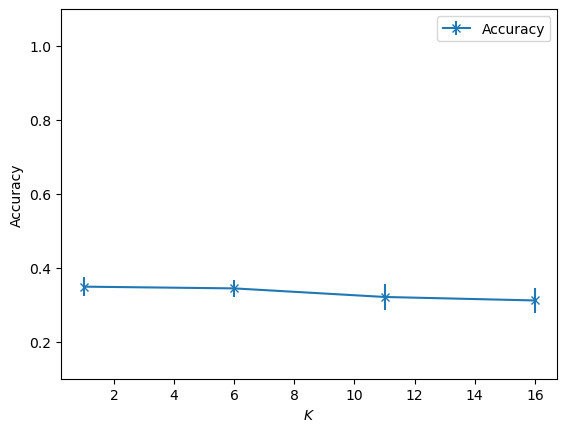

In [55]:
cv_scores = []
cv_scores_std = []
k_range = range(1, 20, 5)
for i in k_range:
    clf = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))
    cv_scores.append(scores.mean())
    cv_scores_std.append(scores.std())

# Plot the relationship
plt.errorbar(k_range, cv_scores, yerr=cv_scores_std, marker='x', label='Accuracy')
plt.ylim([0.1, 1.1])
plt.xlabel('$K$')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

###  RFE technique

In [65]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

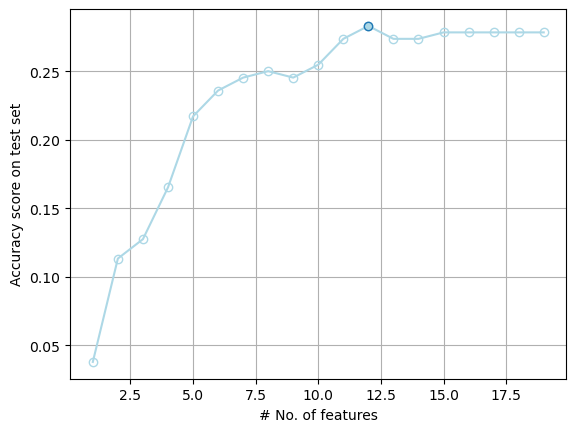

In [69]:
estimator = LogisticRegression()
acc_scores = []
for i in range(1, 20):
    selector = RFE(estimator,n_features_to_select=i)
    selector = selector.fit(X_train, y_train)
    supp = selector.get_support()

    predicted = selector.predict(X_test)
    acc_score = accuracy_score(y_test, predicted)
    acc_scores.append(acc_score)

best = 1
for item in acc_scores:
    if item > acc_scores[best - 1]:
        best = acc_scores.index(item) + 1

plt.grid()
plt.xlabel('# No. of features')
plt.ylabel('Accuracy score on test set')
plt.plot(range(1, 20), acc_scores, marker = 'o', color = 'lightblue', markeredgewidth = 1 ,markeredgecolor = 'lightblue', markerfacecolor = 'None')
plt.plot(best, acc_scores[best-1], marker = 'o', markerfacecolor = 'lightblue')